# Data Dive 5
## Marketing Work for Food Delivery Service

### Kennidee Jones, Hayley Stanley, Bunker Brock, Nicholas Sartino

In [44]:
# Modules

#!pip install missingno
# Comment out if not needed - used briefly to export png images from bar graphs.
#!pip install plotly-orca
#!pip install -U kaleido
#!pip install geopandas

In [45]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
from shapely.geometry import Point


plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

import plotly.express as px
import plotly.io as pio

import missingno as msno


In [46]:
# Read data from multiple sources and concatenate data frames
df_test = (pd.read_csv('test.csv', header = 0))
df_train = (pd.read_csv('train.csv',header = 0))

df = pd.concat([df_test,df_train],ignore_index=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56992 entries, 0 to 56991
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           56992 non-null  object 
 1   Delivery_person_ID           56992 non-null  object 
 2   Delivery_person_Age          56992 non-null  object 
 3   Delivery_person_Ratings      56992 non-null  object 
 4   Restaurant_latitude          56992 non-null  float64
 5   Restaurant_longitude         56992 non-null  float64
 6   Delivery_location_latitude   56992 non-null  float64
 7   Delivery_location_longitude  56992 non-null  float64
 8   Order_Date                   56992 non-null  object 
 9   Time_Orderd                  56992 non-null  object 
 10  Time_Order_picked            56992 non-null  object 
 11  Weatherconditions            56992 non-null  object 
 12  Road_traffic_density         56992 non-null  object 
 13  Vehicle_conditio

In [48]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,NaN
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian,NaN
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,NaN
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian,NaN
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian,NaN


In [49]:
df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition
count,56992.000000,56992.000000,56992.000000,56992.000000,56992.000000
mean,17.034171,70.264920,17.486049,70.897002,1.024968
std,8.186784,22.861487,7.325665,21.034559,0.839171
min,-30.905562,-88.400467,0.010000,0.010000,0.000000
25%,12.933284,73.170283,12.989166,73.293329,0.000000
50%,18.551440,75.897429,18.636258,76.002471,1.000000
75%,22.728163,78.045359,22.785536,78.107053,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [50]:
# Get the count of NaN values for each column
na_counts = df.isna().sum()

print(na_counts)

ID                                 0
Delivery_person_ID                 0
Delivery_person_Age                0
Delivery_person_Ratings            0
Restaurant_latitude                0
Restaurant_longitude               0
Delivery_location_latitude         0
Delivery_location_longitude        0
Order_Date                         0
Time_Orderd                        0
Time_Order_picked                  0
Weatherconditions                  0
Road_traffic_density               0
Vehicle_condition                  0
Type_of_order                      0
Type_of_vehicle                    0
multiple_deliveries                0
Festival                           0
City                               0
Time_taken(min)                11399
dtype: int64


In [51]:
# Specify the columns of interest
columns_of_interest = ['Restaurant_latitude', 'Restaurant_longitude']

# Create an empty DataFrame to store rows with 0 values
zero_values_df = pd.DataFrame()

# Loop through columns and rows
for column in columns_of_interest:
    # Use boolean indexing to select rows where the value is 0
    zero_rows = df[df[column] == 0]
    
    # Concatenate the selected rows to the new DataFrame
    zero_values_df = pd.concat([zero_values_df, zero_rows], ignore_index=True)

# Display the new DataFrame
zero_values_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4946,VADRES04DEL01,22,4.6,0.0,0.0,0.11,0.11,08-03-2022,23:40:00,23:50:00,conditions Windy,Low,1,Drinks,scooter,NaN,No,Urban,NaN
1,0x4598,RANCHIRES14DEL03,35,4.8,0.0,0.0,0.06,0.06,01-04-2022,22:15:00,22:25:00,conditions Sunny,Low,2,Snack,scooter,0,No,Metropolitian,NaN
2,0x9bb,VADRES16DEL01,23,4.4,0.0,0.0,0.01,0.01,24-03-2022,10:20:00,10:30:00,conditions Windy,Low,0,Snack,motorcycle,0,No,Metropolitian,NaN
3,0xd05f,DEHRES02DEL01,30,4.7,0.0,0.0,0.11,0.11,14-02-2022,21:55:00,22:00:00,conditions Cloudy,Jam,0,Snack,motorcycle,2,No,Metropolitian,NaN
4,0xcb17,ALHRES06DEL02,25,4.9,0.0,0.0,0.02,0.02,17-02-2022,10:00:00,10:15:00,conditions Sunny,Low,1,Buffet,scooter,0,No,Metropolitian,NaN


In [52]:
# Drop these rows from the main dataframe because they make no sense

# Use boolean indexing to select rows where any of the specified columns have a value of 0
rows_to_drop = df[(df[columns_of_interest] == 0).any(axis=1)]

# Drop the selected rows from the original DataFrame
df = df.drop(rows_to_drop.index)

In [53]:
# Clean up negative lat/long values
negative_lat_long_columns = ['Delivery_location_latitude', 'Delivery_location_longitude','Restaurant_latitude', 'Restaurant_longitude']

# Convert negative values to positive equivalents
df[negative_lat_long_columns] = df[negative_lat_long_columns].abs()

In [54]:
# Create a feature for rows with no delivery lat/long and call it "Ate in Store"

# Specify the columns of interest
in_store_columns = ['Delivery_location_latitude', 'Delivery_location_longitude']

# Create a boolean mask for rows where both 'Delivery_location_latitude' and 'Delivery_location_longitude' are equal to 0
in_store_mask = (df[in_store_columns] < 70).all(axis=1)

# Create the 'In Store' column and set values based on the conditions
df['In Store'] = 'Delivery'  # Default value for all rows
df.loc[in_store_mask, 'In Store'] = 'In Store'

In [55]:
# Using pd.isna()
nan_rows = df[pd.isna(df['Time_taken(min)'])]

nan_rows.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),In Store
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,...,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,NaN,Delivery
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,...,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian,NaN,Delivery
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,...,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,NaN,Delivery
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,...,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian,NaN,Delivery
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,...,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian,NaN,Delivery


In [56]:
# Using pd.notna()
not_nan_rows = df[pd.notna(df['Time_taken(min)'])]

not_nan_rows.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),In Store
11399,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,...,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,Delivery
11400,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,...,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,Delivery
11401,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,...,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,Delivery
11402,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,...,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,Delivery
11403,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,...,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,Delivery


In [57]:
df.head(100)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),In Store
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,...,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,NaN,Delivery
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,...,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian,NaN,Delivery
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,...,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,NaN,Delivery
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,...,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian,NaN,Delivery
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,...,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian,NaN,Delivery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0xd0f4,LUDHRES01DEL02,24,4.8,30.873988,75.842739,30.893988,75.862739,13-02-2022,10:15:00,...,conditions Sandstorms,Low,1,Snack,motorcycle,NaN,No,Urban,NaN,Delivery
105,0x6e8c,INDORES010DEL02,27,4.6,22.750040,75.902847,22.800040,75.952847,30-03-2022,21:25:00,...,conditions Stormy,Jam,1,Buffet,motorcycle,0,No,Metropolitian,NaN,Delivery
106,0xa1ee,JAPRES20DEL02,36,4.3,26.956431,75.776649,26.976431,75.796649,19-03-2022,09:55:00,...,conditions Windy,Low,0,Buffet,motorcycle,1,No,Urban,NaN,Delivery
107,0x4720,PUNERES07DEL02,26,4.6,18.546947,73.900626,18.676947,74.030626,10-03-2022,23:00:00,...,conditions Stormy,Low,2,Buffet,electric_scooter,1,No,Metropolitian,NaN,Delivery


In [60]:
# Clean up Weather Values
column_to_modify = 'Weatherconditions'

# Remove the string 'condition' from each value in the specified column
df[column_to_modify] = df[column_to_modify].str.replace('conditions ', '', regex=False)


In [61]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),In Store
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,...,NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian,NaN,Delivery
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,...,Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian,NaN,Delivery
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,...,Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian,NaN,Delivery
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,...,Fog,Medium,1,Meal,scooter,1,No,Metropolitian,NaN,Delivery
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,...,Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian,NaN,Delivery


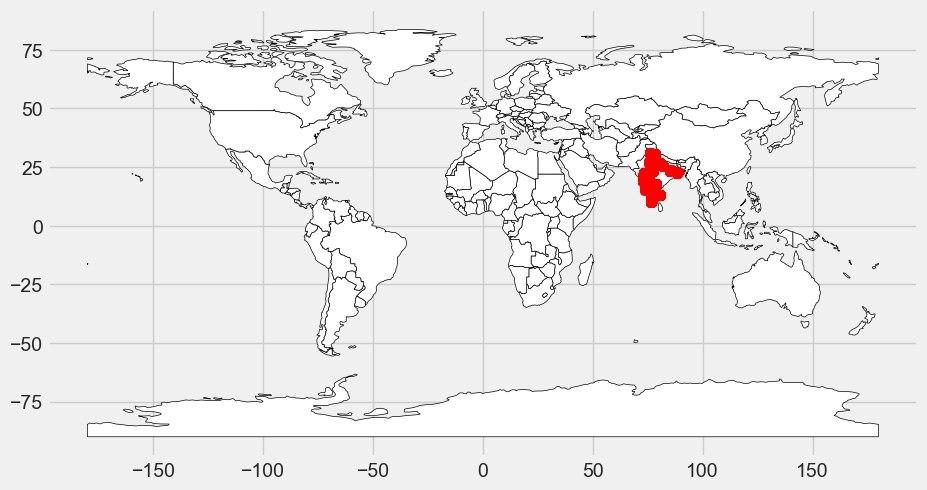

In [38]:
# Create a GeoDataFrame from the DataFrame by creating Point geometries
geometry = [Point(xy) for xy in zip(df['Delivery_location_longitude'], df['Delivery_location_latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

# Plot the GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6), color='white', edgecolor='black')

# Plot the GeoDataFrame on top
geo_df.plot(ax=ax, color='red', marker='o', markersize=50)

# Display the plot
plt.show()

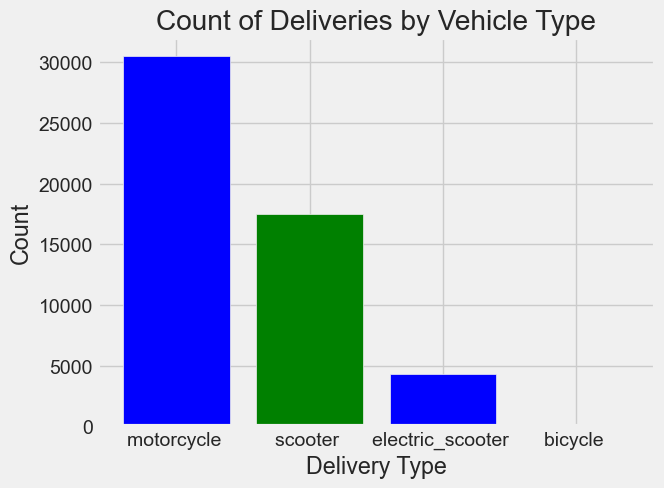

In [41]:
# Count the occurrences of each category in the 'In Store' column
traffic_counts = df['Type_of_vehicle'].value_counts()

# Create a bar chart
plt.bar(traffic_counts.index, traffic_counts.values, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Delivery Type')
plt.ylabel('Count')
plt.title('Count of Deliveries by Vehicle Type')

# Show the plot
plt.show()

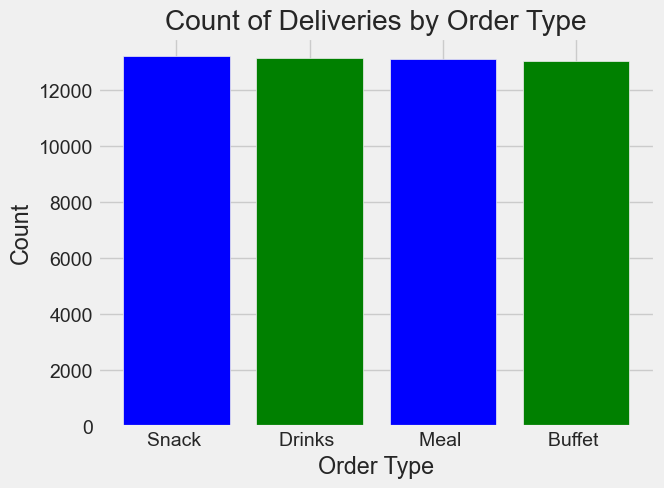

In [43]:
# Count the occurrences of each category in the 'In Store' column
order_counts = df['Type_of_order'].value_counts()

# Create a bar chart
plt.bar(order_counts.index, order_counts.values, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Order Type')
plt.ylabel('Count')
plt.title('Count of Deliveries by Order Type')

# Show the plot
plt.show()

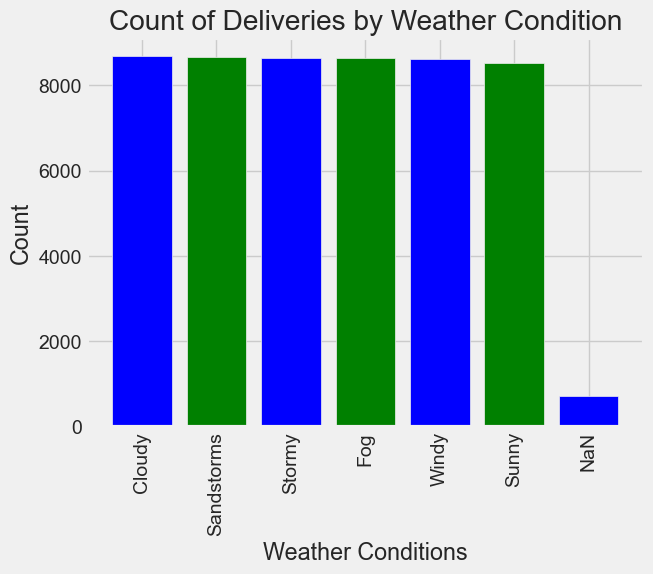

In [64]:
# Count the occurrences of each category in the 'Weatherconditions' column
weather_counts = df['Weatherconditions'].value_counts()

# Create a bar chart
plt.bar(weather_counts.index, weather_counts.values, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.title('Count of Deliveries by Weather Condition')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [65]:
print(weather_counts)

Weatherconditions
Cloudy        8675
Sandstorms    8655
Stormy        8645
Fog           8644
Windy         8622
Sunny         8527
NaN            714
Name: count, dtype: int64


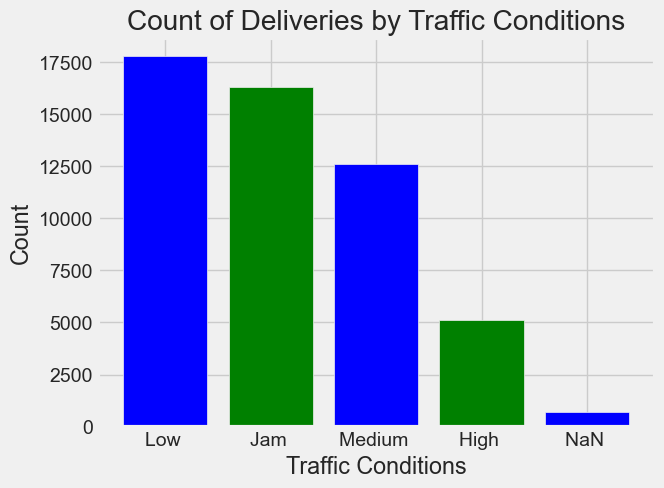

In [63]:
# Count the occurrences of each category in the 'Road_traffic_density' column
traffic_counts = df['Road_traffic_density'].value_counts()

# Create a bar chart
plt.bar(traffic_counts.index, traffic_counts.values, color=['blue', 'green'])

# Add labels and title
plt.xlabel('Traffic Conditions')
plt.ylabel('Count')
plt.title('Count of Deliveries by Traffic Conditions')

# Show the plot
plt.show()